# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() - avoids the Openweather API key from being diasabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howard springs
Processing Record 2 of Set 1 | costa teguise
City not found. Skipping...
Processing Record 3 of Set 1 | puerto baquerizo moreno
Processing Record 4 of Set 1 | stanisic
Processing Record 5 of Set 1 | tsiombe
Processing Record 6 of Set 1 | de queen
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | brigham city
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | tshabong
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | sorgun
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | novo a

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howard springs,-12.4970,131.0470,87.82,75,100,2.24,AU,1732586664
1,puerto baquerizo moreno,-0.9000,-89.6000,71.13,71,80,10.74,EC,1732586667
2,stanisic,45.9400,19.1653,38.79,76,6,7.02,RS,1732586668
3,tsiombe,-25.3000,45.4833,75.45,93,53,9.35,MG,1732586669
4,de queen,34.0379,-94.3413,49.01,76,0,4.61,US,1732586670


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,87.82,75,100,2.24,AU,1732586664
1,puerto baquerizo moreno,-0.9000,-89.6000,71.13,71,80,10.74,EC,1732586667
2,stanisic,45.9400,19.1653,38.79,76,6,7.02,RS,1732586668
3,tsiombe,-25.3000,45.4833,75.45,93,53,9.35,MG,1732586669
4,de queen,34.0379,-94.3413,49.01,76,0,4.61,US,1732586670


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

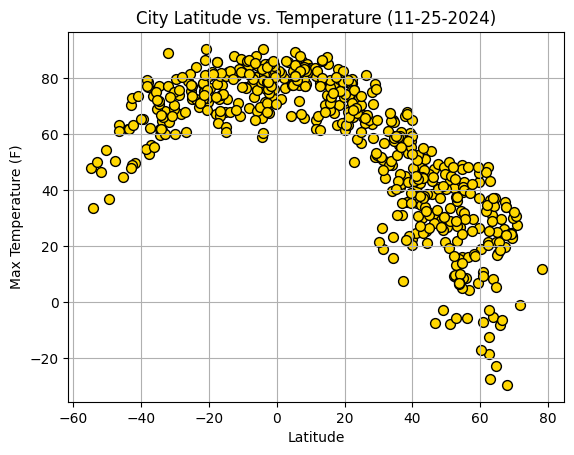

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"], 
    color="gold",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

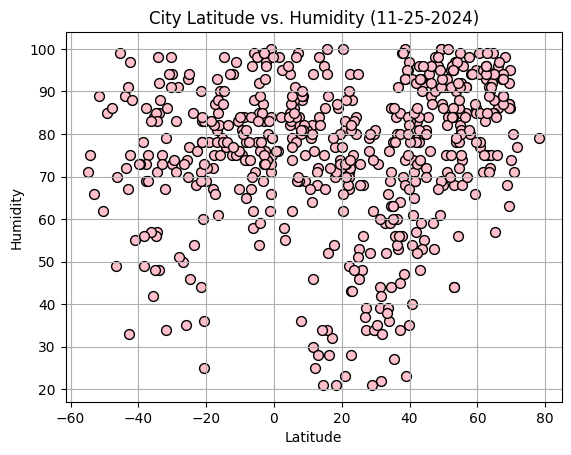

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"], 
    color="pink",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

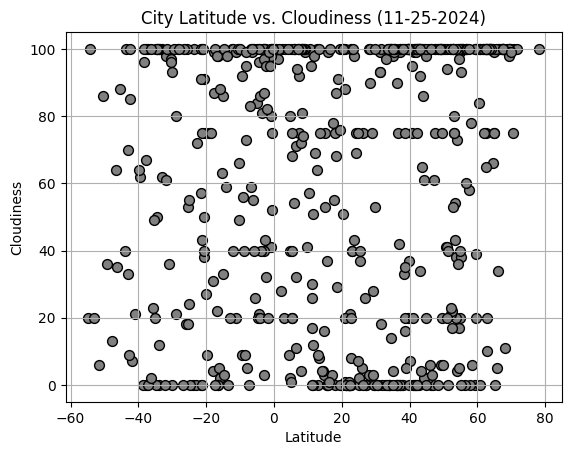

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"], 
    color="gray",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

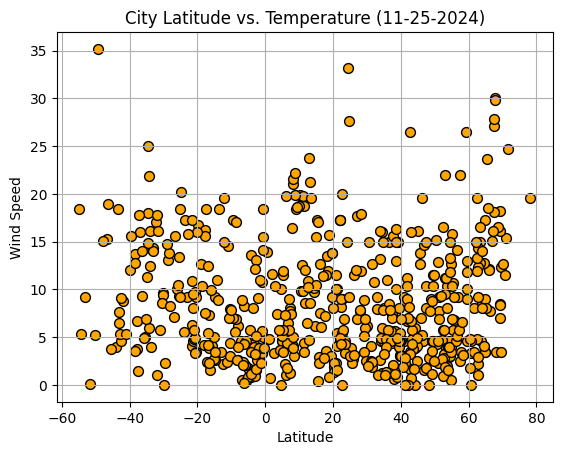

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"], 
    color="orange",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_labels, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,stanisic,45.9400,19.1653,38.79,76,6,7.02,RS,1732586668
4,de queen,34.0379,-94.3413,49.01,76,0,4.61,US,1732586670
7,saipan,15.1355,145.7010,84.90,86,75,17.27,MP,1732586673
8,brigham city,41.5102,-112.0155,35.38,69,100,1.99,US,1732586503
10,olonkinbyen,70.9221,-8.7187,27.46,71,100,15.39,SJ,1732586676


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howard springs,-12.4970,131.0470,87.82,75,100,2.24,AU,1732586664
1,puerto baquerizo moreno,-0.9000,-89.6000,71.13,71,80,10.74,EC,1732586667
3,tsiombe,-25.3000,45.4833,75.45,93,53,9.35,MG,1732586669
5,blackmans bay,-43.0167,147.3167,70.52,67,70,7.65,AU,1732586594
6,puerto ayora,-0.7393,-90.3518,72.55,84,41,5.01,EC,1732586672


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7205491961609355


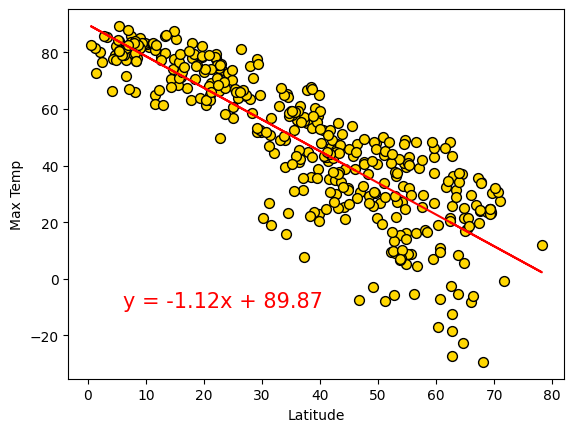

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10), "gold")

The r-value is: 0.3950532786938698


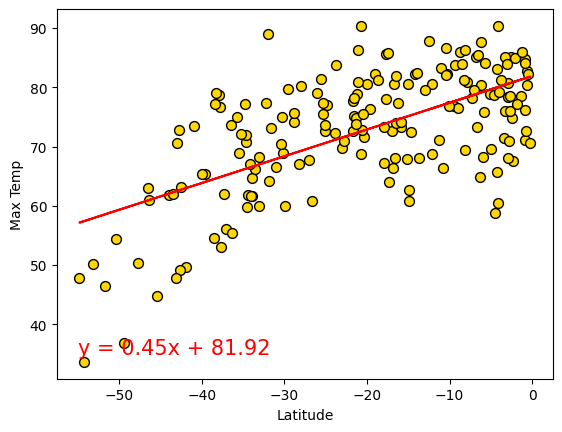

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,35), "gold")

**Discussion about the linear relationship:** In the northern hemisphere, maximum temperature has a stronger and more consistent negative linear relationship with latitude. In the southern hemisphere, the relationship is positive but weaker and more variable, likely due to differences in geography and climate systems. These patterns highlight how geography and latitude influence temperature distributions across hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0722107965422998


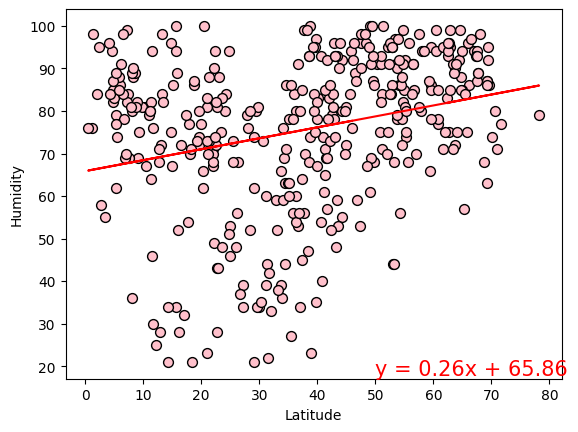

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(50,18), "pink")

The r-value is: 0.040888017108702816


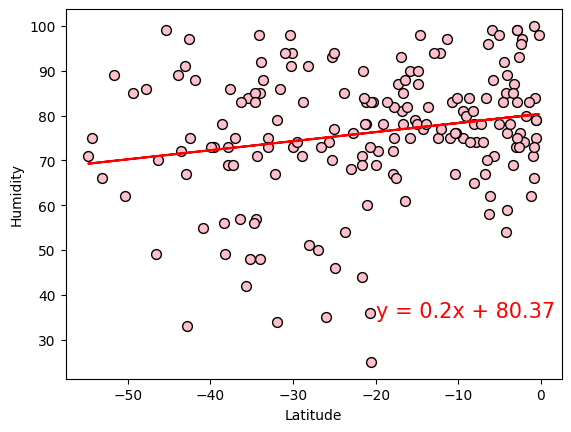

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-20,35), "pink")

**Discussion about the linear relationship:** The northern hemisphere hows a weak positive relationship between latitude and humidity, with slightly lower baseline humidity near the equator. The sputhern hemisphere also shows a weak positive relationship, but with higher baseline humidity near the equator and slightly less variation with latitude. The difference in intercepts and slopes between the two hemispheres likely reflects the greater influence of oceans in the southern hemisphere and the diverse landmass in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0474095730814405


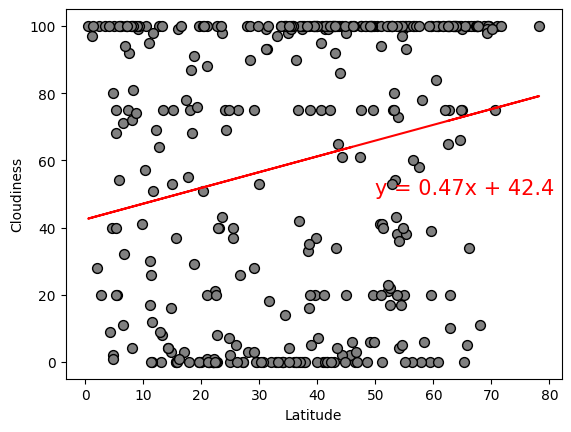

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(50,50), "gray")

The r-value is: 0.027906627270629918


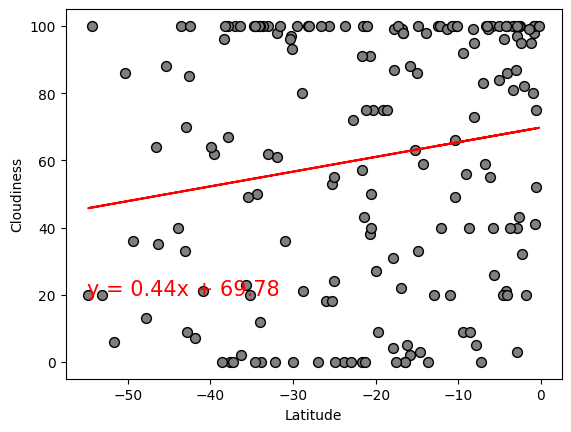

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-55,20), "gray")

**Discussion about the linear relationship:** Both hemispheres show a weak to moderate positive relationship between latitude and cloudiness. Cloudiness is slightly more sensitive to latitude changes in the northern hemisphere, as indicated by the steeper slope. The southern hemisphere has higher baseline cloudiness, potentially due to its geography. Despite the trend, the high variability in cloudiness data suggests that additional factors significantly influence cloud cover beyond latitude alone.   

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0038279824346778794


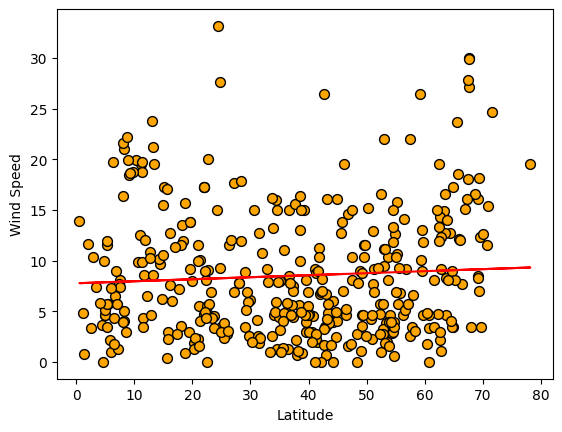

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(50,35), "orange")

The r-value is: 0.11854622558346195


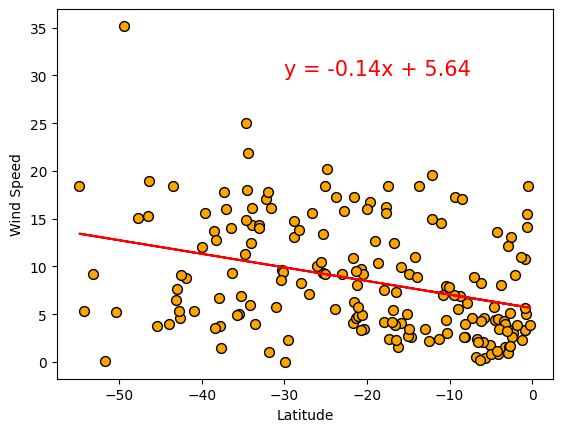

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-30,30), "orange")

**Discussion about the linear relationship:** In the northern hemisphere, there is no significant linear relationship between latitude and wind speed, as wind speeds remain relatively consistent across latitudes. In the southern hemisphere, there is a weak negative relationship, where wind speeds tend to decrease slightly as latitude approaches the equator. The high variability in both hemispheres suggests that factors other than latitude, such as geographic features and atmospheric systems, play a more significant role in determining wind speeds.